In [9]:
import numpy as np
import pandas as pd
from matplotlib import pyplot
import re
import matplotlib
matplotlib.font_manager._rebuild()

matplotlib.rc("font",family="SimHei")



In [10]:
df = pd.read_csv('游戏服务端.csv',sep=",")
df.head()

,职位,工作地址,公司全称,薪水,学历,工作经验,行业标签
0,【留学生】C/C++开发工程师_上海,上海·浦东新区·金桥,华为技术有限公司,20-35K,本科,在校/应届,计算机软件
1,服务端开发工程师-.net-Choice（2021春招）,上海,东方财富集团,15-25K·16薪,本科,在校/应届,证券/期货
2,Java游戏服务端开发,上海·闵行区·七宝,免免,5-10K,本科,在校/应届,游戏
3,【华为无线22届校招】C/C++开发,上海·浦东新区·金桥,华为技术有限公司,15-25K·15薪,本科,在校/应届,计算机软件
4,服务端开发,上海·浦东新区·联洋,淘宝,20-24K,硕士,在校/应届,移动互联网


In [11]:
offer = df['薪水']

In [12]:
yearOfferMin=pd.Series(dtype=np.float64)
yearOfferMax=pd.Series(dtype=np.float64)
for index,value in offer.items():
    xinshui = re.findall(r'\d+',str(value))
    if(len(xinshui)==3):
        Min = int(xinshui[0])*int(xinshui[2])
        Max = int(xinshui[1])*int(xinshui[2])
        yearOfferMin = yearOfferMin.append(pd.Series(Min))
        yearOfferMax = yearOfferMax.append(pd.Series(Max))
    else:
        Min = int(xinshui[0])*12
        Max = int(xinshui[1])*12
        yearOfferMin = yearOfferMin.append(pd.Series(Min))
        yearOfferMax = yearOfferMax.append(pd.Series(Max))        
#yearOfferMin.index=offer.index
#yearOfferMax.index=offer.index

yearOfferMax.index=offer.index
yearOfferMin.index=offer.index
df['最低年薪'] = yearOfferMin
df['最高年薪'] = yearOfferMax
df

,职位,工作地址,公司全称,薪水,学历,工作经验,行业标签,最低年薪,最高年薪
0,【留学生】C/C++开发工程师_上海,上海·浦东新区·金桥,华为技术有限公司,20-35K,本科,在校/应届,计算机软件,240,420
1,服务端开发工程师-.net-Choice（2021春招）,上海,东方财富集团,15-25K·16薪,本科,在校/应届,证券/期货,240,400
2,Java游戏服务端开发,上海·闵行区·七宝,免免,5-10K,本科,在校/应届,游戏,60,120
3,【华为无线22届校招】C/C++开发,上海·浦东新区·金桥,华为技术有限公司,15-25K·15薪,本科,在校/应届,计算机软件,225,375
4,服务端开发,上海·浦东新区·联洋,淘宝,20-24K,硕士,在校/应届,移动互联网,240,288
...,...,...,...,...,...,...,...,...,...
200,软件开发工程师,上海·浦东新区·金桥,华为,15-30K·14薪,本科,在校/应届,计算机软件,210,420
201,软件开发工程师【无线】,上海·浦东新区·金桥,华为,15-30K·14薪,本科,在校/应届,计算机软件,210,420
202,中间件golang研发工程师,上海·浦东新区·陆家嘴,蚂蚁金服,20-30K·20薪,本科,在校/应届,移动互联网,400,600
203,中间件golang研发工程师,上海·浦东新区·陆家嘴,蚂蚁金服,20-30K·20薪,本科,在校/应届,移动互联网,400,600


In [13]:
tongfen = [20]

df['最高年薪分段']=pd.qcut(df['最高年薪'],q=10)
df['最低年薪分段']=pd.qcut(df['最低年薪'],q=10)

In [14]:
df

,职位,工作地址,公司全称,薪水,学历,工作经验,行业标签,最低年薪,最高年薪,最高年薪分段,最低年薪分段
0,【留学生】C/C++开发工程师_上海,上海·浦东新区·金桥,华为技术有限公司,20-35K,本科,在校/应届,计算机软件,240,420,"(360.0, 420.0]","(210.0, 267.2]"
1,服务端开发工程师-.net-Choice（2021春招）,上海,东方财富集团,15-25K·16薪,本科,在校/应届,证券/期货,240,400,"(360.0, 420.0]","(210.0, 267.2]"
2,Java游戏服务端开发,上海·闵行区·七宝,免免,5-10K,本科,在校/应届,游戏,60,120,"(96.0, 120.0]","(23.999, 60.0]"
3,【华为无线22届校招】C/C++开发,上海·浦东新区·金桥,华为技术有限公司,15-25K·15薪,本科,在校/应届,计算机软件,225,375,"(360.0, 420.0]","(210.0, 267.2]"
4,服务端开发,上海·浦东新区·联洋,淘宝,20-24K,硕士,在校/应届,移动互联网,240,288,"(225.0, 288.0]","(210.0, 267.2]"
...,...,...,...,...,...,...,...,...,...,...,...
200,软件开发工程师,上海·浦东新区·金桥,华为,15-30K·14薪,本科,在校/应届,计算机软件,210,420,"(360.0, 420.0]","(180.0, 210.0]"
201,软件开发工程师【无线】,上海·浦东新区·金桥,华为,15-30K·14薪,本科,在校/应届,计算机软件,210,420,"(360.0, 420.0]","(180.0, 210.0]"
202,中间件golang研发工程师,上海·浦东新区·陆家嘴,蚂蚁金服,20-30K·20薪,本科,在校/应届,移动互联网,400,600,"(420.0, 1800.0]","(267.2, 1200.0]"
203,中间件golang研发工程师,上海·浦东新区·陆家嘴,蚂蚁金服,20-30K·20薪,本科,在校/应届,移动互联网,400,600,"(420.0, 1800.0]","(267.2, 1200.0]"


In [15]:
df.to_excel("游戏服务端.xlsx",index=False)

In [16]:
dict={}
for i in pd.qcut(df['最高年薪'],q=10):
    if(not (i in dict.keys())):
        dict[i]=1
    else:
        dict[i]=dict[i]+1
dict2={}

for key,value in dict.items():
    dict2[str(key)]=value

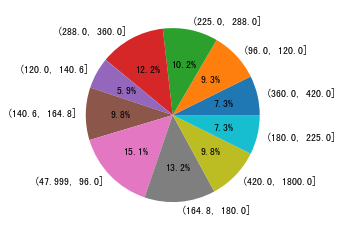

In [17]:
labels = dict2.keys()
pyplot.pie(dict2.values(),labels=labels,autopct='%.1f%%')
pyplot.show()

In [18]:
dict={}
for i in pd.qcut(df['最低年薪'],q=10):
    if(not (i in dict.keys())):
        dict[i]=1
    else:
        dict[i]=dict[i]+1
dict2={}

for key,value in dict.items():
    dict2[str(key)]=value

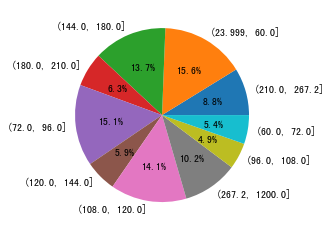

In [19]:
labels = dict2.keys()
pyplot.pie(dict2.values(),labels=labels,autopct='%.1f%%')
pyplot.show()

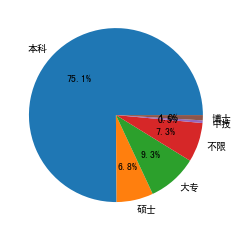

In [20]:
dict={}
for i in df['学历']:
    if not (i in dict.keys()):
        dict[i]=1
    else:
        dict[i]+=1
pyplot.pie(dict.values(),labels=dict.keys(),autopct='%.1f%%')
pyplot.show()

In [21]:
print("最低年薪最高:"+str(df['最低年薪'].max())+"         "+"最低年薪最低:"+str(df['最低年薪'].min())+"      "+"最低年薪中位数:"+str(df['最低年薪'].median())+"      "+"最低年薪众数:"+str(df['最低年薪'].mode())+"      "+"最低年薪均值:"+str(df['最低年薪'].mean()))

最低年薪最高:1200         最低年薪最低:24      最低年薪中位数:120.0      最低年薪众数:0    120
dtype: int64      最低年薪均值:151.22439024390243


In [22]:
print("最高年薪最高:"+str(df['最高年薪'].max())+"         "+"最高年薪最低:"+str(df['最高年薪'].min())+"      "+"最高年薪中位数:"+str(df['最高年薪'].median())+"      "+"最高年薪众数:"+str(df['最高年薪'].mode())+"      "+"最高年薪均值:"+str(df['最高年薪'].mean()))

最高年薪最高:1800         最高年薪最低:48      最高年薪中位数:180.0      最高年薪众数:0    180
dtype: int64      最高年薪均值:237.93658536585366
